<a href="https://colab.research.google.com/github/ryang253/Project0/blob/master/Exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

![alt text](https:// [link text](https://))## Import Data from Google Drive
- Tutorial: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
- To Import Straight from Kaggle, follow this turorial: https://towardsdatascience.com/setting-up-kaggle-in-google-colab-ebb281b61463

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
## Click the link, choose the google account, click allow, then copy the code then paste it in the "Enter verification code:" box, then hit enter

In [ ]:
# https://drive.google.com/open?id=1pd-1xs_1zXAi7I_JDdK-JACHdDPdQ0BL
link = 'https://drive.google.com/open?id=1pd-1xs_1zXAi7I_JDdK-JACHdDPdQ0BL' # The shareable link file id: 1pd-1xs_1zXAi7I_JDdK-JACHdDPdQ0BL
fluff, id = link.split('=') 
print (id) # Verify that you have everything after '='

1pd-1xs_1zXAi7I_JDdK-JACHdDPdQ0BL


In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')

DATASET_COLUMNS = ["sentiment", "ids", "date", "flag", "user", "text"]  
df = pd.read_csv('Filename.csv', engine='python', names=DATASET_COLUMNS)
df.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Have fun with the dataset :)

In [ ]:
import re
import pickle
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

import nltk
  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


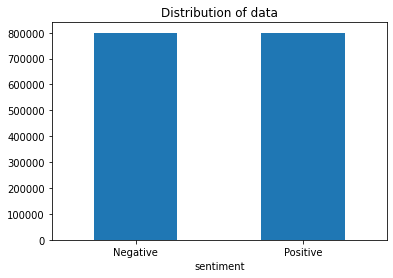

In [ ]:
#removing the unnecessary columns
df = df[['sentiment','text']]
#replacing the values to ease understanding
df['sentiment'] = df['sentiment'].replace(4,1)
#plotting the distribution for dataset
ax = df.groupby('sentiment').count().plot(kind='bar',title='Distribution of data',
                                               legend = False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
#storing data in lists
text, sentiment = list(df['text']), list(df['sentiment'])


Preprocess Text
1.lower casing
2.Replacing URLs
3.Replacing emojis
4.Replacing usernames
5.Removing non-alphabets
6.Removing consecutive letters (3 or more)
7.Removing short words (less than 2)
8.Removing stopwords
9.Lemmatizing (convert a word to its base form)

In [ ]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}


In [ ]:
# Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here','hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was', 'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']
             

In [ ]:
def preprocess(textdata):
  processedText = []
  
  #create Lemmatizer and Stemmer
  wordLemm = WordNetLemmatizer()

  #Define regex patterns
  urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
  userPattern       = '@[^\s]+'
  alphaPattern      = "[^a-zA-Z0-9]"
  sequencePattern   = r"(.)\1\1+"
  seqReplacePattern = r"\1\1"
 
  for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
  return processedText



In [ ]:

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import time
t = time.time()

processedtext = preprocess(text)

print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')


Text Preprocessing complete.
Time Taken: 121 seconds


There is some problem with this section ↑ -- Oh it seems to work now



Analysing the data.
Plot WordCLouds for Positive and Negative tweets

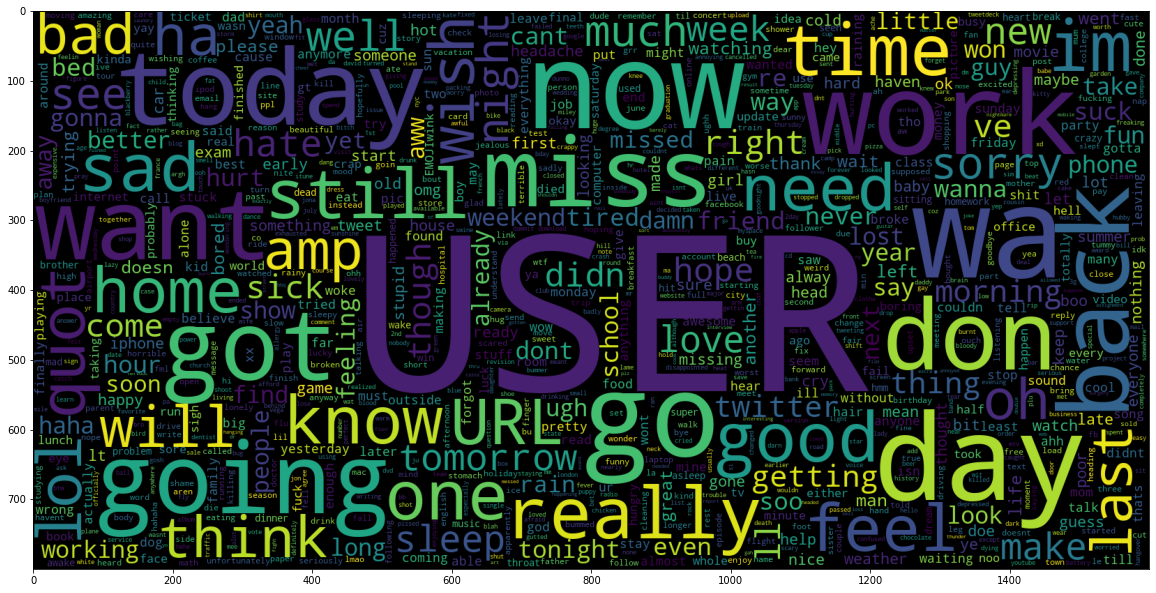

In [ ]:
#Wordcloud for negative tweets
data_neg = processedtext[:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

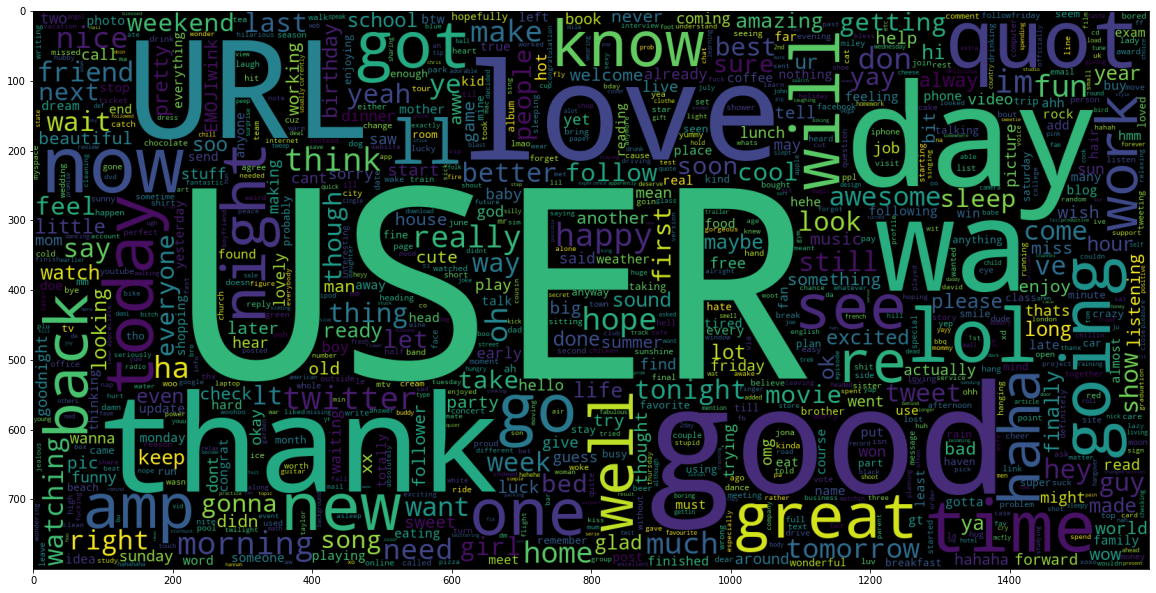

In [ ]:
#WordClouds for positive tweets
data_pos = processedtext[800000:]
wc = WordCloud(max_words = 1000, width = 1600, height = 800,
               collocations = False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

Splitting the data:
Training Data 80%, Test Data 20%

The kernal I read used 0.95/0.05 split - I think 0.8/0.2 is a better start

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(processedtext, sentiment, test_size = 0.20, random_state=0)
print(f'Data Split done.')

TF-IDF Vectoriser

In [ ]:
#TF_IDF indicates what the importance of the word is 
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(x_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))


AttributeError: ignored

Transforming the dataset

In [ ]:
x_train = vectoriser.transform(x_train)
x_test = vectoriser.transform(x_test)
print(f'Data Transformed.')

Creating and Evaluating Models

1.   Bernoulli Naive Bayes (BernoulliNB)
2.   Linear Support Vector Classification (LinearSVC)

1.   Logistic Regression (LR)











Evaluate Model Function

Dont rly understand the confusion matrix.
Read this: https://machinelearningmastery.com/confusion-matrix-machine-learning/

In [ ]:
def model_Evaluate(model):
  #predict values for test dataset
  y_pred = model.predict(x_test)
  #print the evaluation metrics for the dataset
  print(classification_report(y_test, y_pred))
  #compute and plot the confusion matrix
  cf_matrix = confusion_matrix(y_test,y_pred)

  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

  labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)

  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


BernoulliNB Model

              precision    recall  f1-score   support

           0       0.81      0.79      0.80    159815
           1       0.80      0.81      0.80    160185

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



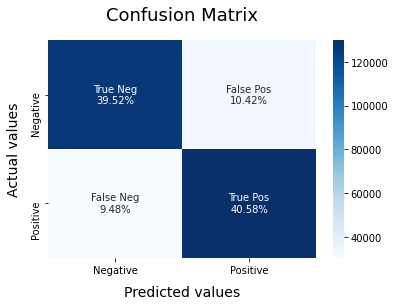

In [ ]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(x_train,y_train)
model_Evaluate(BNBmodel)

LinearSVC Model

              precision    recall  f1-score   support

           0       0.82      0.81      0.81    159815
           1       0.81      0.82      0.82    160185

    accuracy                           0.82    320000
   macro avg       0.82      0.82      0.82    320000
weighted avg       0.82      0.82      0.82    320000



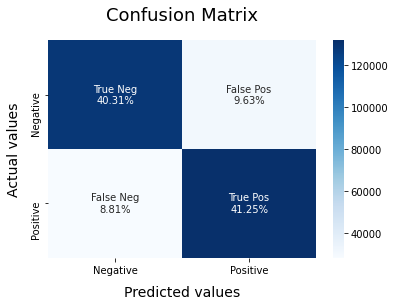

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train,y_train)
model_Evaluate(SVCmodel)

Logistic Regression Model

              precision    recall  f1-score   support

           0       0.83      0.82      0.82    159815
           1       0.82      0.84      0.83    160185

    accuracy                           0.83    320000
   macro avg       0.83      0.83      0.83    320000
weighted avg       0.83      0.83      0.83    320000



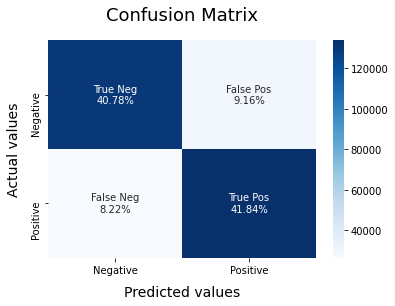

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs = -1)
LRmodel.fit(x_train, y_train)
model_Evaluate(LRmodel)

I dont rly understand how each model works, but here are some notes

*   The accuracy doesn't differ that much
*   Bernoulli is the fastest, while LR takes forever



Saving the models

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
ls

In [ ]:
model_save_name = 'classifier.pt'
path = F"/content/gdrive/My Drive/{model_save_name}" 
torch.save(model.state_dict(), path)